In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [65]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

In [66]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [67]:
X.shape

(9663, 29)

In [68]:
y.shape

(9663,)

In [69]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [70]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',LinearRegression())
])
Params = [{
        'model': [Lasso()],
        'model__alpha': [0.1, 1, 10], 
        'model__fit_intercept': [True, False],
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1, 10],
        'model__fit_intercept': [True, False],
    }
]

grid_search = GridSearchCV(pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [Lasso()], 'model__alpha': [0.1, 1, 10],
                          'model__fit_intercept': [True, False]},
                         {'model': [Ridge(alpha=10)],
                          'model__alpha': [0.1, 1, 10],
                          'model__fit_intercept': [True, False]}],
             verbose=1)

In [71]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model': Ridge(alpha=10), 'model__alpha': 10, 'model__fit_intercept': True} with a score of 0.06


In [72]:
y_pred1 = grid_search.predict(X_test)

In [73]:
grid_search.score(X_test, y_test)

0.0639603300189241

In [74]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',LinearRegression())
])

Params = [{
        'model': [Lasso()],
        'model__alpha': [0.1, 1, 10],
        'model__fit_intercept': [True, False],
    },
    {
        'model': [Ridge()],
        'model__alpha': [2, 4, 6, 8],
        'model__fit_intercept': [True, False],
    }
]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [Lasso()], 'model__alpha': [0.1, 1, 10],
                          'model__fit_intercept': [True, False]},
                         {'model': [Ridge(alpha=8)],
                          'model__alpha': [2, 4, 6, 8],
                          'model__fit_intercept': [True, False]}],
             verbose=1)

In [75]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model': Ridge(alpha=8), 'model__alpha': 8, 'model__fit_intercept': True} with a score of 0.06


In [76]:
y_pred2 = grid_search.predict(X_test)

In [77]:
grid_search.score(X_test, y_test)

0.06395820279550124

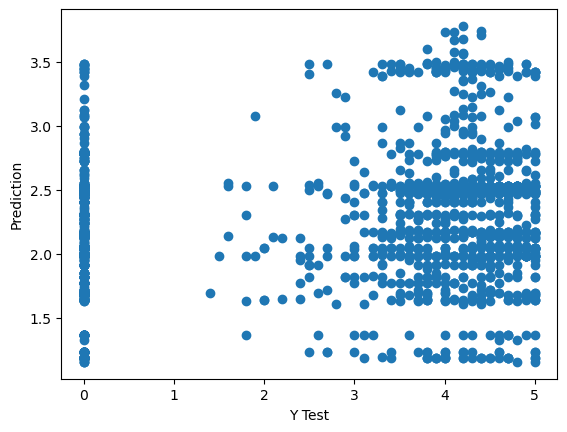

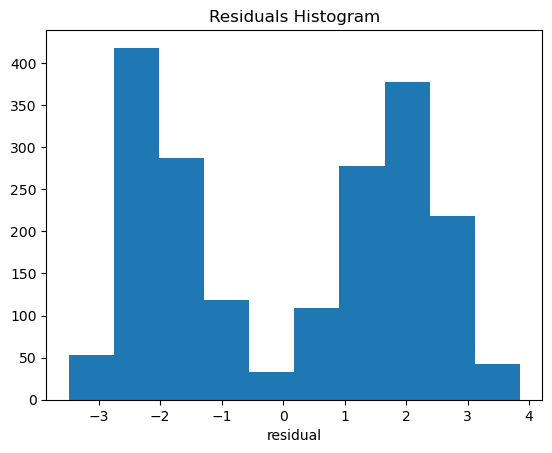

In [78]:
# Print the accuracy
metrics.r2_score(y_test, y_pred1)

plt.scatter(y_test, y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()



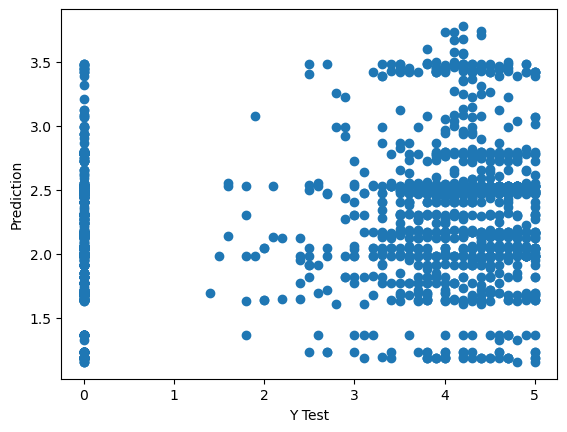

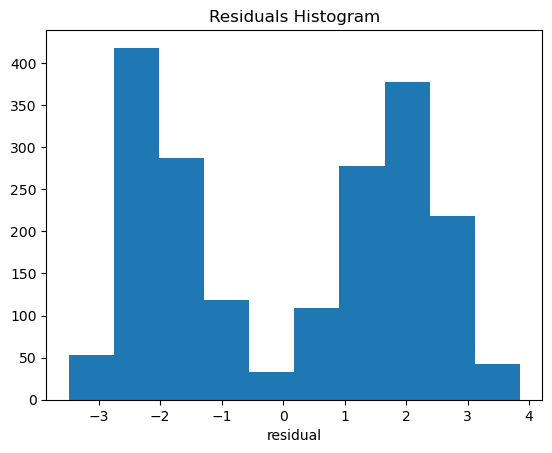

In [79]:
# Print the accuracy
metrics.r2_score(y_test, y_pred2)

plt.scatter(y_test, y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()